In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
domain_list = [[1,12],
[13,31],
[32,50],
[51,64],
[65,77],
[78,96],
[97,106],
[107,122],
[123,131],
[132,148],
[149,157],
[158,177],
[178,184],
[185,201],
[202,216],
[217,226],
[227,243],
[244,255],
[256,270],
[271,275],
[276,282],
[283,298],
[299,306],
[307,315],
[316,324],
[325,334],
[335,348],
[349,359],
[360,371],
[372,388]]

In [7]:
bigdomains = [
    # disordered loops
[[1,12], [255,316]],
#helix around comm 
[[13,47]],
#comm 
[[97,184]],
#active site-comm helix 
[[81,96]],
#helices 
[[185,220], [226,246]],
#b-sheets 
[[48,80], [221,225], [246,254], [317,374]],
#end 
[[375,388]],
]
bigdomains

[[[1, 12], [255, 316]],
 [[13, 47]],
 [[97, 184]],
 [[81, 96]],
 [[185, 220], [226, 246]],
 [[48, 80], [221, 225], [246, 254], [317, 374]],
 [[375, 388]]]

In [8]:
labels_big = ['loops', 'a-hel', 'COMM', 'AS-COMM', 'a-hel','b-sheets', 'end']

In [9]:
for i, d in enumerate(domain_list):
    print(i,d)

0 [1, 12]
1 [13, 31]
2 [32, 50]
3 [51, 64]
4 [65, 77]
5 [78, 96]
6 [97, 106]
7 [107, 122]
8 [123, 131]
9 [132, 148]
10 [149, 157]
11 [158, 177]
12 [178, 184]
13 [185, 201]
14 [202, 216]
15 [217, 226]
16 [227, 243]
17 [244, 255]
18 [256, 270]
19 [271, 275]
20 [276, 282]
21 [283, 298]
22 [299, 306]
23 [307, 315]
24 [316, 324]
25 [325, 334]
26 [335, 348]
27 [349, 359]
28 [360, 371]
29 [372, 388]


In [10]:
labelnums = [
    1,
13,
32,
51,
65,
78,
97,
107,
123,
132,
149,
158,
178,
185,
202,
217,
227,
244,
256,
271,
276,
283,
299,
307,
316,
325,
335,
349,
360,
372,]

In [11]:
domain_list_names = [[1,12],
[13,31],
[32,50],
[51,64],
[65,77],
'L82',
'104',
'107+',
[123,131],
[132,148],
[149,157],
'162+',
'182+',
'185+',
[202,216],
[217,226],
'227+',
[244,255],
[256,270],
[271,275],
[276, 282],
[283,298],
'301',
[307,315],
[316,324],
[325,334],
[335 ,348],
[349,359],
[360,371],
[372,388]]

In [12]:
def heatmap_vals(edges, domain_list):
    edges_results = np.array(edges)
    heatmap_vals = np.zeros((len(domain_list), len(domain_list)))
    for nj,j in enumerate(domain_list):
        j1, j2=j
        sizej= j2-j1
        for ni, i in enumerate(domain_list):
            i1, i2 = i
            sizei = i2-i1
            value = edges_results[i1-1:i2-1,j1-1:j2-1].sum()/(sizei*sizej)
            #print(nj, ni, value)
            if ni==nj:
                value=0
            heatmap_vals[nj,ni] = value
    return heatmap_vals

In [13]:
def heatmap_vals_mult(edges, domain_list):
    edges_results = np.array(edges)
    heatmap_vals = np.zeros((len(domain_list), len(domain_list)))
    for nj,jdom in enumerate(domain_list):
        #ldom = len(d)
        sizej = 0
        
        booleanj = np.zeros([388], dtype=np.uint8)
        for subd in jdom:
            r1,r2 = subd
            sizej += r2-r1
            booleanj[r1-1:r2-1] = 1
            
        
        for ni, idom in enumerate(domain_list):
            sizei = 0
            
            booleani = np.zeros([388], dtype=np.uint8)
            for subd in idom:
                r1,r2 = subd
                sizei += r2-r1
                booleani[r1-1:r2-1] = 1
            
            bothboolean = booleanj.reshape(-1,1) & booleani.reshape(1,-1)
                
            value = edges_results[bothboolean].sum()/(sizei*sizej)
            
            if ni==nj:
                value=0
            heatmap_vals[nj,ni] = value
    return heatmap_vals

In [14]:
def plot_heatmap(heatmap_vals, title, labels_big=False):
    ax = sns.heatmap(heatmap_vals, linewidth=1,
                 cmap="Blues")
    if labels_big:
        ax.set_xticklabels(labels_big)
        ax.set_yticklabels(labels_big)
    plt.title('{}'.format(title))
    plt.xlabel('Region')
    plt.ylabel('Region')
    plt.plot()
    plt.show()

In [15]:
aas = [25,26,30,39]

In [16]:
edges25 = pd.read_csv('edges_results_coo25.csv', index_col='Unnamed: 0')
edges26 = pd.read_csv('edges_results_coo26.csv', index_col='Unnamed: 0')
edges30 = pd.read_csv('edges_results_coo30.csv', index_col='Unnamed: 0')
edges39 = pd.read_csv('edges_results_coo39.csv', index_col='Unnamed: 0')

In [17]:
heat_25_big = heatmap_vals_mult(edges25, bigdomains)
heat_26_big = heatmap_vals_mult(edges26, bigdomains)
heat_30_big = heatmap_vals_mult(edges30, bigdomains)
heat_39_big = heatmap_vals_mult(edges39, bigdomains)

In [18]:
heat_25 = heatmap_vals(edges25, domain_list)
heat_26 = heatmap_vals(edges26, domain_list)
heat_30 = heatmap_vals(edges30, domain_list)
heat_39 = heatmap_vals(edges39, domain_list)

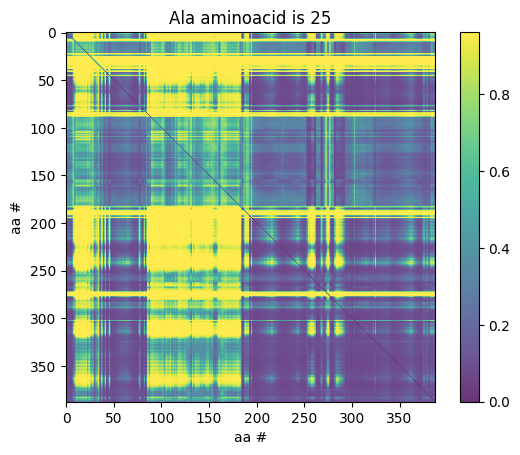

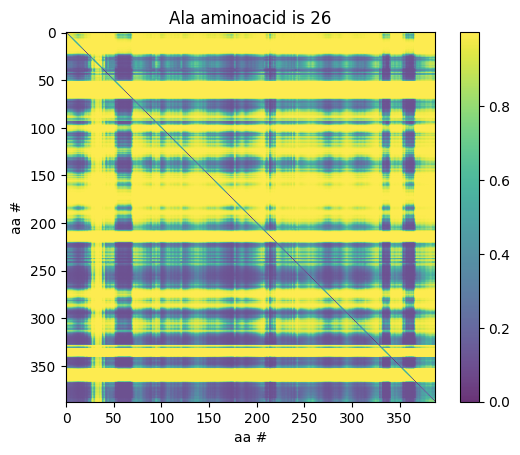

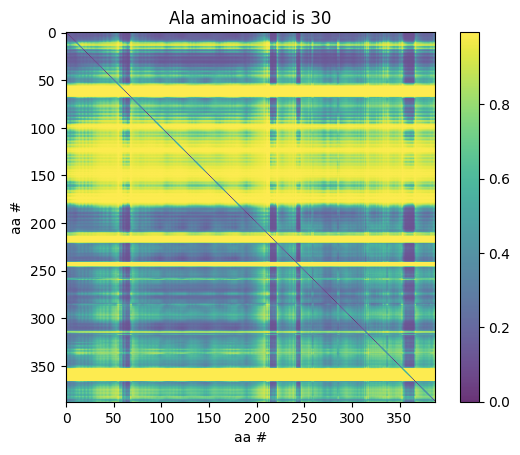

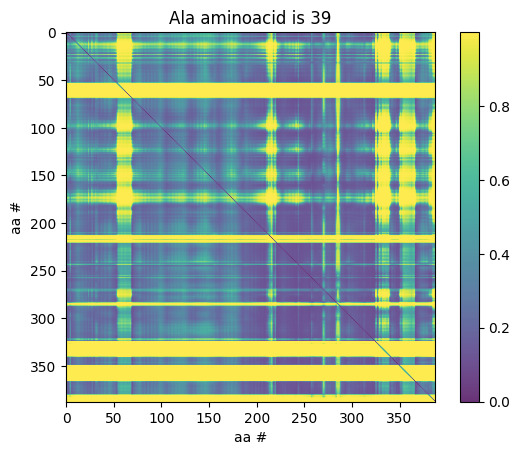

In [19]:
for edges, title in zip([edges25, edges26, edges30, edges39], aas):
    plt.imshow(edges.values, alpha=0.8)
    plt.colorbar()
    plt.title('Ala aminoacid is '+str(title))
    plt.xlabel('aa #')
    plt.ylabel('aa #')
    plt.show()

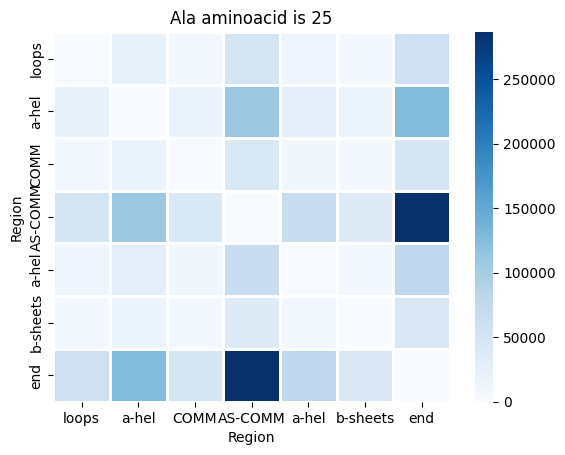

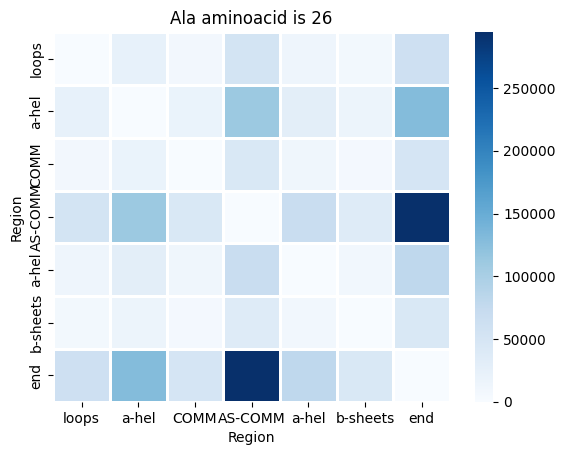

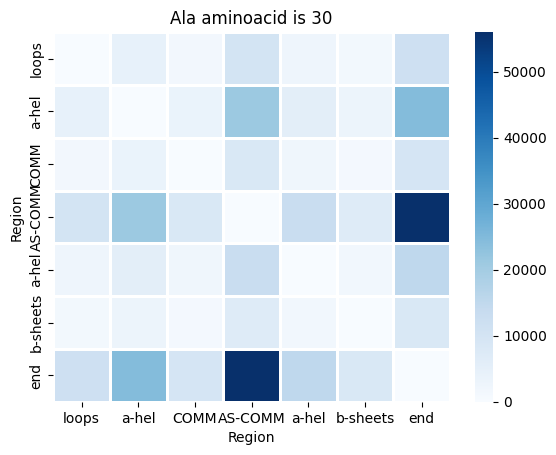

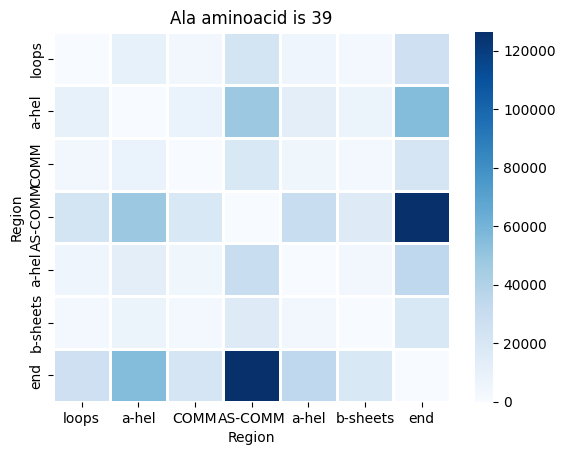

In [20]:
for heat, title in zip([heat_25_big, heat_26_big, heat_30_big, heat_39_big], aas):

    plot_heatmap(heat, 'Ala aminoacid is '+str(title), labels_big=labels_big)

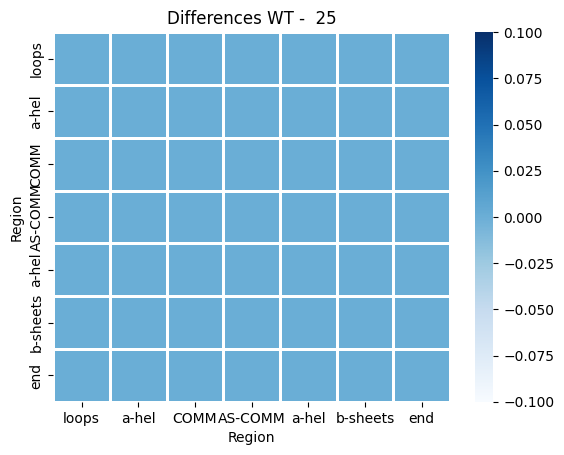

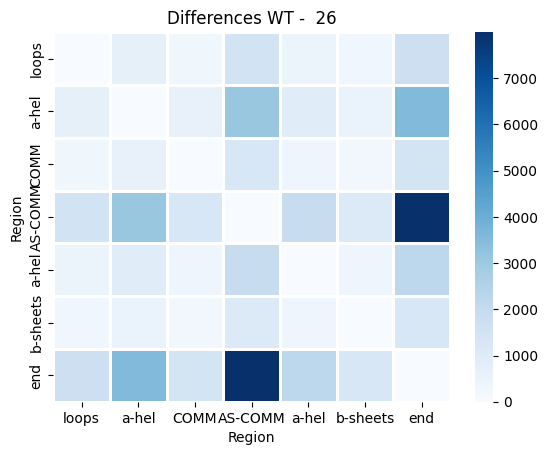

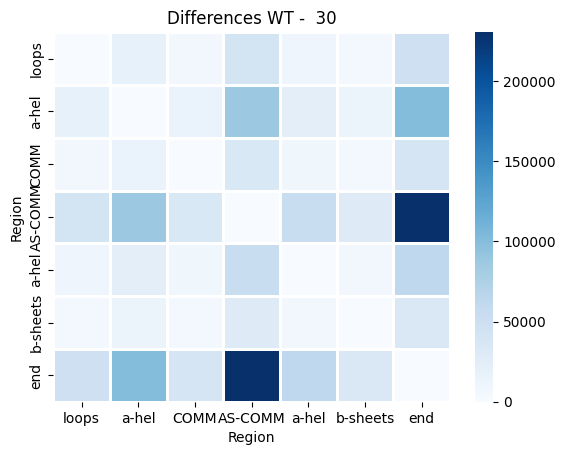

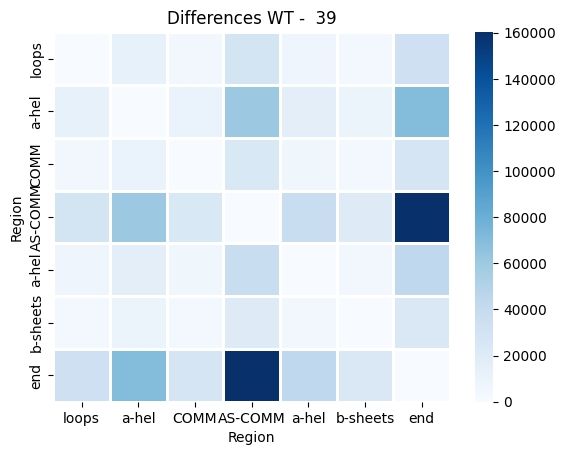

In [21]:
for heat, title in zip([heat_25_big, heat_26_big, heat_30_big, heat_39_big], aas):

    plot_heatmap(np.abs(heat_25_big-heat), 'Differences WT -  '+str(title), labels_big=labels_big)

In [22]:
def plot_heatmap_sm(heatmap_vals, title, labelnums):
    fig, ax = plt.subplots()
    ax = sns.heatmap(heatmap_vals, linewidth=1,
                 cmap="Blues")

    ax.set_xticks(np.arange(0, len(heat_25)), labelnums)
    ax.set_yticks(np.arange(0, len(heat_25)), labelnums)
    ax.set_xticklabels(labelnums,rotation=45, fontsize=7)
    ax.set_yticklabels(labelnums,rotation=45, fontsize=7)

    plt.title('{}'.format(title))
    plt.xlabel('Helix or Sheet #')
    plt.ylabel('Helix or Sheet #')
    plt.plot()
    plt.show()

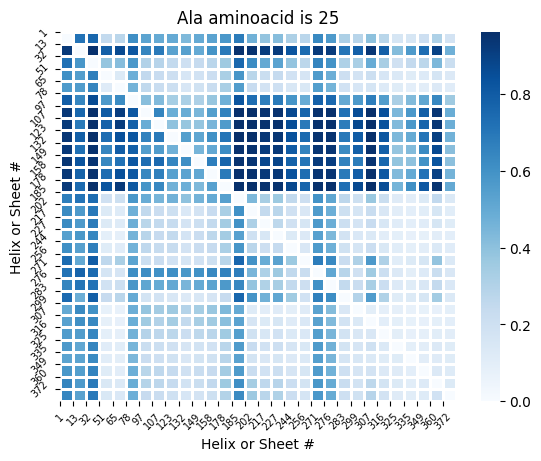

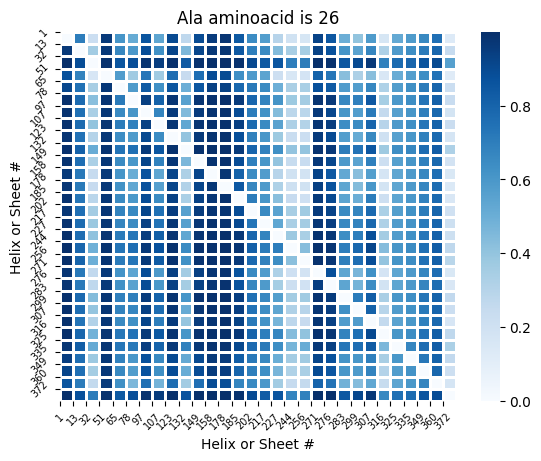

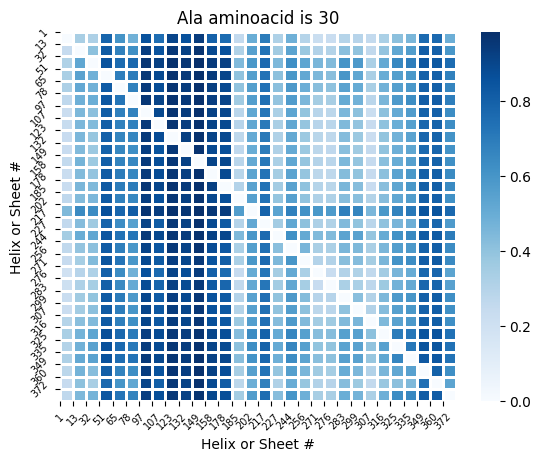

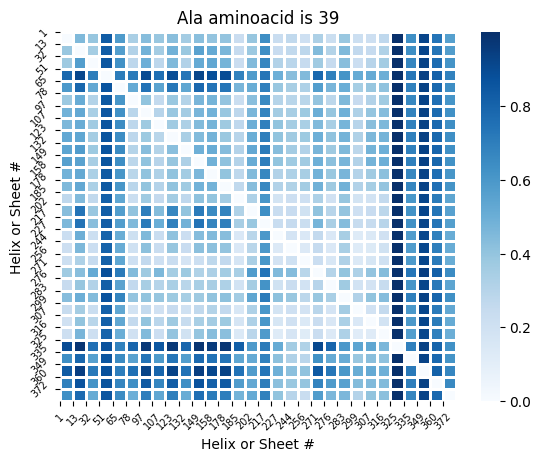

In [23]:
for heat, title in zip([heat_25, heat_26, heat_30, heat_39], aas):

    plot_heatmap_sm(heat, 'Ala aminoacid is '+str(title), labelnums)

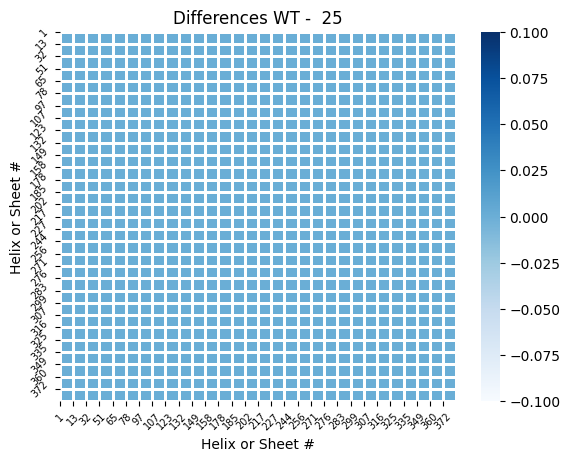

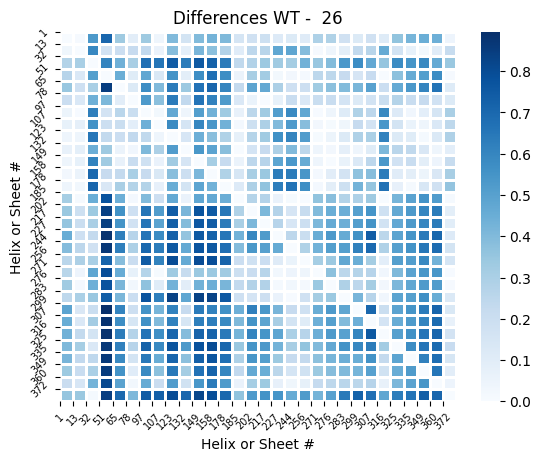

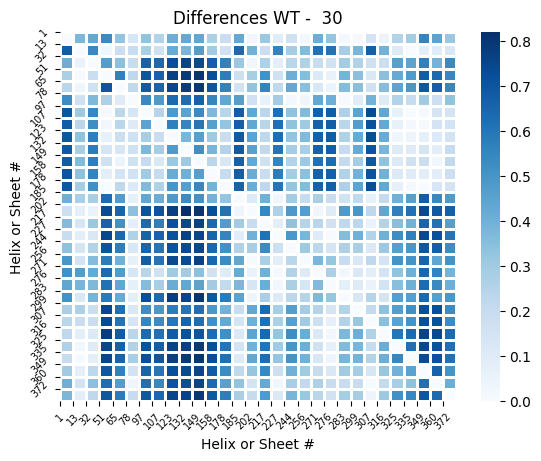

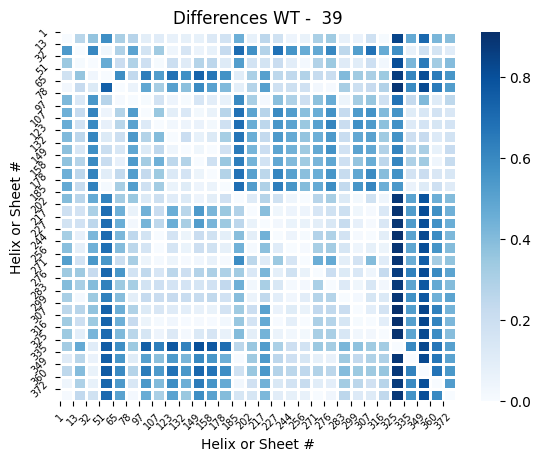

TypeError: only integer scalar arrays can be converted to a scalar index

In [30]:
for heat, title in zip([heat_25, heat_26, heat_30, heat_39], aas):

    plot_heatmap_sm(np.abs(heat_25-heat), 'Differences WT -  '+str(title), labelnums)

plot_heatmap_sm(np.mean(heat_26, heat_30, heat_39), 'Average differences', labelnums)

In [26]:
heat_25

array([[0.        , 0.71644863, 0.75542931, 0.24925685, 0.27730261,
        0.61005976, 0.52401432, 0.49463691, 0.49914784, 0.43434096,
        0.49797731, 0.52692881, 0.57264463, 0.6828382 , 0.46750086,
        0.38329614, 0.41561585, 0.31770584, 0.2757789 , 0.63438539,
        0.56334705, 0.31907633, 0.28325973, 0.40065188, 0.28053969,
        0.15921816, 0.16029226, 0.20804979, 0.31508482, 0.17720797],
       [0.92488229, 0.        , 0.95371603, 0.78805698, 0.86715294,
        0.81510225, 0.64713747, 0.68998745, 0.53248179, 0.5388963 ,
        0.49735229, 0.59077055, 0.69288904, 0.950722  , 0.94958758,
        0.91388608, 0.91841416, 0.82486737, 0.7413339 , 0.92005398,
        0.91436101, 0.70337867, 0.78252113, 0.93301211, 0.78738426,
        0.42095199, 0.56575412, 0.73535647, 0.89494455, 0.47187983],
       [0.72024202, 0.5817791 , 0.        , 0.38118408, 0.41562841,
        0.57201557, 0.30218023, 0.28831482, 0.25130266, 0.20083494,
        0.24253903, 0.27502547, 0.360075  , 0.

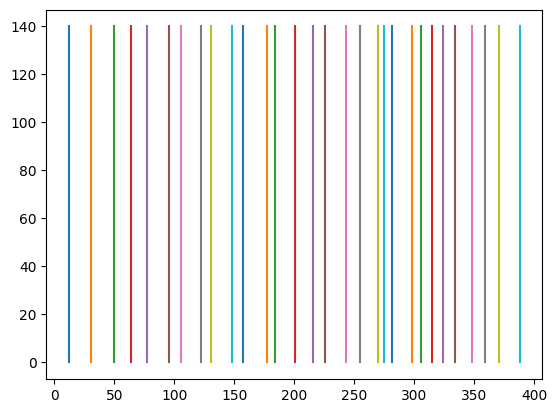

In [16]:
doms=[12,
31,
50,
64,
77,
96,
106,
122,
131,
148,
157,
177,
184,
201,
216,
226,
243,
255,
270,
275,
282,
298,
306,
315,
324,
334,
348,
359,
371,
388,]

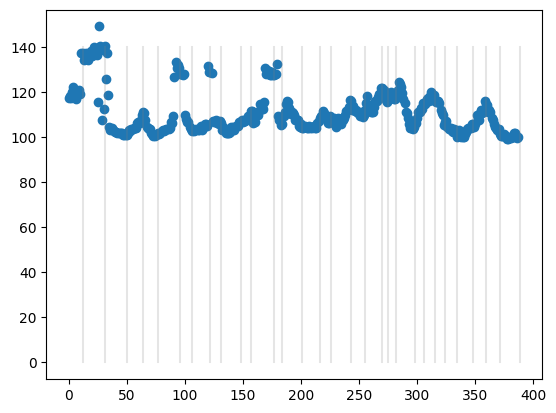

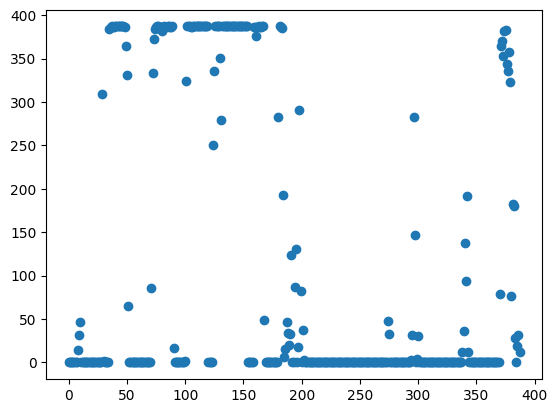

In [18]:
plt.scatter(range(len(edges.sum(axis=0))),edges.sum(axis=0))
for d in doms:
    plt.plot([d,d],[0,140], color='gray', alpha=0.2)
plt.show()
plt.scatter(range(len(edges.sum(axis=1))),edges.sum(axis=1))
plt.show()

In [ ]:
### SHORTEST PATH

# 25
target node : 26
                shortest_path : 82->26 : 1.0
target node : 30
                shortest_path : 82->30 : 1.0
target node : 39
                shortest_path : 82->371->83->39 : 0.48374653374776244
                remove(82->371) : 82->370->83->39 : 0.5068288804031909
                remove(371->83) : 82->370->83->39 : 0.5068288804031909
                remove(83->39) : 82->370->198->39 : 0.5145328678190708
target node : 104
                shortest_path : 82->104 : 0.26592002902179956
target node : 105
                shortest_path : 82->339->105 : 0.42655319534242153
                remove(82->339) : 82->337->105 : 0.4435699488967657
                remove(339->105) : 82->337->105 : 0.4435699488967657
target node : 106
                shortest_path : 82->339->106 : 0.39959308225661516
                remove(82->339) : 82->337->106 : 0.4104835530743003
                remove(339->106) : 82->337->106 : 0.4104835530743003
target node : 107
                shortest_path : 82->107 : 0.27143819304183125
target node : 108
                shortest_path : 82->108 : 0.3098436491563916
target node : 117
                shortest_path : 82->117 : 0.23536749556660652
target node : 118
                shortest_path : 82->118 : 0.23949656449258327
target node : 119
                shortest_path : 82->119 : 0.23598654568195343
target node : 162
                shortest_path : 82->341->162 : 0.37858049757778645
                remove(82->341) : 82->337->162 : 0.38951848819851875
                remove(341->162) : 82->337->162 : 0.38951848819851875
target node : 166
                shortest_path : 82->341->166 : 0.3771737441420555
                remove(82->341) : 82->339->166 : 0.3772433716803789
                remove(341->166) : 82->339->166 : 0.3772433716803789
target node : 182
                shortest_path : 82->341->182 : 0.4719769358634949
                remove(82->341) : 82->337->182 : 0.47725341096520424
                remove(341->182) : 82->337->182 : 0.47725341096520424
target node : 183
                shortest_path : 82->183 : 0.9573727138340473
target node : 184
                shortest_path : 82->371->184 : 0.3713850392960012
                remove(82->371) : 82->79->184 : 0.3998012123629451
                remove(371->184) : 82->79->184 : 0.3998012123629451
target node : 185
                shortest_path : 82->370->185 : 0.2964691601227969
                remove(82->370) : 82->369->185 : 0.3072173879481852
                remove(370->185) : 82->369->185 : 0.3072173879481852
target node : 186
                shortest_path : 82->370->186 : 0.7945012655109167
                remove(82->370) : 82->341->80->186 : 0.8176350933499634
                remove(370->186) : 82->341->80->186 : 0.8176350933499634
target node : 227
                shortest_path : 82->371->227 : 0.2738634266424924
                remove(82->371) : 82->370->227 : 0.2960010366514325
                remove(371->227) : 82->370->227 : 0.2960010366514325
target node : 228
                shortest_path : 82->370->228 : 0.29767301259562373
                remove(82->370) : 82->369->228 : 0.30781432893127203
                remove(370->228) : 82->369->228 : 0.30781432893127203
target node : 231
                shortest_path : 82->370->231 : 0.3016746728681028
                remove(82->370) : 82->369->231 : 0.3138543404638767
                remove(370->231) : 82->369->231 : 0.3138543404638767
target node : 301
                shortest_path : 82->58->301 : 0.3349082861095667
                remove(82->58) : 82->341->300->301 : 0.3471346702426672
                remove(58->301) : 82->341->300->301 : 0.3471346702426672



In [ ]:
### 30
target node : 104
                shortest_path : 82->107->104 : 0.1529807923361659
                remove(82->107) : 82->110->104 : 0.15366801247000694
                remove(107->104) : 82->110->104 : 0.15366801247000694
target node : 105
                shortest_path : 82->107->105 : 0.1597699485719204
                remove(82->107) : 82->110->105 : 0.16005781362764537
                remove(107->105) : 82->110->105 : 0.16005781362764537
target node : 106
                shortest_path : 82->107->106 : 0.16039567859843373
                remove(82->107) : 82->110->106 : 0.16053684544749558
                remove(107->106) : 82->110->106 : 0.16053684544749558
target node : 107
                shortest_path : 82->107 : 0.08315678918734193
target node : 108
                shortest_path : 82->108 : 0.09773163171485066
target node : 117
                shortest_path : 82->117 : 0.09725894080474973
target node : 118
                shortest_path : 82->118 : 0.10778681002557278

target node : 119
                shortest_path : 82->119 : 0.10858171433210373
target node : 162
                shortest_path : 82->107->128->162 : 0.21890416590031236
                remove(82->107) : 82->110->128->162 : 0.21907038672361523
                remove(107->128) : 82->110->128->162 : 0.21907038672361523
                remove(128->162) : 82->110->129->162 : 0.22013294452335685
target node : 166
                shortest_path : 82->107->166 : 0.15224586182739586
                remove(82->107) : 82->126->166 : 0.1636780290864408
                remove(107->166) : 82->126->166 : 0.1636780290864408
target node : 182
                shortest_path : 82->182 : 0.09830843191593885
target node : 183
                shortest_path : 82->183 : 0.11731886211782694
target node : 184
                shortest_path : 82->184 : 0.1544249439612031
target node : 185
                shortest_path : 82->180->185 : 0.22001675702631474
                remove(82->180) : 82->179->185 : 0.22482560016214848
                remove(180->185) : 82->179->185 : 0.22482560016214848
target node : 186
                shortest_path : 82->180->186 : 0.20940763968974352
                remove(82->180) : 82->179->186 : 0.2143940906971693
                remove(180->186) : 82->179->186 : 0.2143940906971693
target node : 227
                shortest_path : 82->180->227 : 0.21641878131777048
                remove(82->180) : 82->179->227 : 0.22285099467262626
                remove(180->227) : 82->179->227 : 0.22285099467262626
target node : 228
                shortest_path : 82->180->228 : 0.21815535333007574
                remove(82->180) : 82->179->228 : 0.22553867287933826
                remove(180->228) : 82->179->228 : 0.22553867287933826
target node : 231
                shortest_path : 82->231 : 0.17465293686836958
target node : 301
                shortest_path : 82->110->171->301 : 0.25711518223397434
                remove(82->110) : 82->107->170->301 : 0.26072966028004885
                remove(110->171) : 82->107->170->301 : 0.26072966028004885
                remove(171->301) : 82->107->170->301 : 0.26072966028004885
target node : 26
                shortest_path : 82->95->26 : 0.2331182265188545
                remove(82->95) : 82->91->26 : 0.240067342761904
                remove(95->26) : 82->91->26 : 0.240067342761904
target node : 30
                shortest_path : 82->95->30 : 0.2366775688715279
                remove(82->95) : 82->91->30 : 0.2438700613565743
                remove(95->30) : 82->91->30 : 0.2438700613565743
target node : 39
                shortest_path : 82->92->39 : 0.2755670687183738
                remove(82->92) : 82->89->39 : 0.2834324073046446
                remove(92->39) : 82->89->39 : 0.2834324073046446
